<a href="https://colab.research.google.com/github/rodrigo8502/projeto5/blob/main/game_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

!pip install pandas
!pip install scikit-learn





# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_regression # para o teste ANOVA da Seleção Univariada
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA



## Carga do Dataset

In [3]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/rodrigo8502/projeto5/refs/heads/main/vgsales.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')



# Mostra as primeiras linhas do dataset
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
dataset.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
dataset.shape

(16598, 11)

In [ ]:
print(dataset.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [ ]:
# Contando a quantidade de cada classe
value_counts = dataset['Global_Sales'].value_counts()

# Filtrando as classes com mais de 1 ocorrência
classes_to_keep = value_counts[value_counts > 1].index

# Filtrando o DataFrame para manter apenas as classes que aparecem mais de uma vez
dataset_filtered = dataset[dataset['Global_Sales'].isin(classes_to_keep)]

# Exibindo o DataFrame filtrado
print(dataset_filtered)


        Rank                                              Name Platform  \
30        31           Pokémon Yellow: Special Pikachu Edition       GB   
31        32                           Call of Duty: Black Ops     X360   
77        78                                           FIFA 16      PS4   
78        79                                         Wii Party      Wii   
79        80                                            Halo 2       XB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre               Publisher  NA_Sales  EU_Sales  \
30     1998.0  Role-Play

## Separação em conjunto de treino e conjunto de teste com holdout

In [7]:
test_size = 0.30 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:, 1:7]
y = array[:, 7]
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y,
    test_size=test_size, shuffle=True, random_state=seed) # holdout com estratificação


# Parâmetros e partições da validação cruzada
scoring = 'neg_mean_squared_error'
num_particoes = 3
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada sem estratificação

In [4]:
from sklearn.preprocessing import OneHotEncoder

# Criando o OneHotEncoder com sparse=False
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Aplicando a transformação
encoded_columns = encoder.fit_transform(dataset[["Name", "Platform", "Genre", "Publisher"]])

# Verificando o tipo de dados após a codificação
print(encoded_columns.dtype)  # Isso será 'float64' ou 'int64'


float64


In [5]:
# Transformando o resultado para um DataFrame e adicionando as colunas codificadas ao DataFrame original
# Converting the sparse matrix to a dense one if needed



encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(["Name", "Platform", "Genre", "Publisher"]))

# Concatenando com as colunas numéricas
X_encoded = pd.concat([encoded_df, dataset.drop(columns=["Name", "Platform", "Genre", "Publisher", "EU_Sales"])], axis=1)

# Separando a variável dependente (target)
y = dataset["EU_Sales"]

In [10]:
print(X_train.isnull().sum())


Name_'98 Koshien                                0
Name_.hack//G.U. Vol.1//Rebirth                 0
Name_.hack//G.U. Vol.2//Reminisce               0
Name_.hack//G.U. Vol.2//Reminisce (jp sales)    0
Name_.hack//G.U. Vol.3//Redemption              0
                                               ..
Year                                            0
NA_Sales                                        0
JP_Sales                                        0
Other_Sales                                     0
Global_Sales                                    0
Length: 12121, dtype: int64


In [ ]:
print(np.any(pd.isna(y_train)))  # Verifique se há NaNs

False


In [9]:
X_train['Year'] = X_train['Year'].fillna(X_train['Year'].mean())  # Usando a média


In [ ]:


# Supondo que 'df' seja o seu DataFrame original

# Transformando colunas categóricas usando One-Hot Encoding
df_encoded = pd.get_dummies(dataset, columns=["Name", "Platform", "Genre", "Publisher"], drop_first=True)

# Agora as colunas 'Plataforma', 'Gênero' e 'Publicadora' serão transformadas em colunas binárias (0 ou 1)


In [12]:
# Verifique os tipos de dados de X e y
print(y_train.dtype)  # Tipos de dados de X



float64


In [11]:
y_train = np.array(y_train, dtype=np.float64)  # Para valores contínuos (reais)

In [ ]:
print(X_train.dtypes)

Name_.hack//G.U. Vol.1//Rebirth                 float64
Name_.hack//G.U. Vol.2//Reminisce               float64
Name_.hack//G.U. Vol.2//Reminisce (jp sales)    float64
Name_.hack//G.U. Vol.3//Redemption              float64
Name_.hack//Infection Part 1                    float64
                                                 ...   
Year                                            float64
NA_Sales                                        float64
EU_Sales                                        float64
JP_Sales                                        float64
Other_Sales                                     float64
Length: 12117, dtype: object


In [ ]:
X = encoded_columns.drop(columns=["Global_Sales"])  # Substitua "target_column_name" pela coluna alvo
y = encoded_columns["Global_Sales"]  # Substitua "target_column_name" pela sua coluna alvo

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [ ]:
# Verificando se há colunas com strings após o One-Hot Encoding
print(X_encoded.dtypes)


Name_.hack//G.U. Vol.1//Rebirth                 float64
Name_.hack//G.U. Vol.2//Reminisce               float64
Name_.hack//G.U. Vol.2//Reminisce (jp sales)    float64
Name_.hack//G.U. Vol.3//Redemption              float64
Name_.hack//Infection Part 1                    float64
                                                 ...   
Year                                            float64
NA_Sales                                        float64
EU_Sales                                        float64
JP_Sales                                        float64
Other_Sales                                     float64
Length: 12117, dtype: object


In [ ]:
print(type(y_train))

<class 'numpy.ndarray'>


In [12]:


# Padronizando as variáveis independentes (X)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=0.95)  # Mantendo 95% da variabilidade
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
# Remover colunas constantes
X_train = X_train.loc[:, X_train.var() != 0]


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Remover colunas com variância muito baixa (por exemplo, menor que 0.01)
selector = VarianceThreshold(threshold=0.01)
X_filtered = selector.fit_transform(X_scaled)


NameError: name 'X_scaled' is not defined

In [ ]:
print(X_encoded.dtypes)


Name_.hack//G.U. Vol.1//Rebirth                 float64
Name_.hack//G.U. Vol.2//Reminisce               float64
Name_.hack//G.U. Vol.2//Reminisce (jp sales)    float64
Name_.hack//G.U. Vol.3//Redemption              float64
Name_.hack//Infection Part 1                    float64
                                                 ...   
Year                                            float64
NA_Sales                                        float64
EU_Sales                                        float64
JP_Sales                                        float64
Other_Sales                                     float64
Length: 12117, dtype: object


In [ ]:
# Limpeza de espaços extras ou caracteres inesperados
dataset['Name'] = dataset['Name'].str.strip()





In [ ]:
# Remover espaços em branco
dataset['Name'] = dataset['Name'].str.replace('/', '', regex=True)

# Substituir vírgulas por ponto, se necessário
dataset['Name'] = dataset['Name'].str.replace(',', '.')


In [ ]:
dataset['Name'] = dataset['Name'].astype('category')

# Aplicando One-Hot Encoding
df_one_hot = pd.get_dummies(dataset, columns=['Name'])



In [ ]:
dataset['NA_Sales'] = pd.to_numeric(dataset['NA_Sales'], errors='coerce')  # Transformará valores não numéricos em NaN


In [ ]:
dataset['JP_Sales'] = pd.to_numeric(dataset['JP_Sales'], errors='coerce')  # Transformará valores não numéricos em NaN


In [ ]:
dataset['EU_Sales'] = pd.to_numeric(dataset['EU_Sales'], errors='coerce')  # Transformará valores não numéricos em NaN


In [ ]:
dataset['Global_Sales'] = pd.to_numeric(dataset['Global_Sales'], errors='coerce')  # Transformará valores não numéricos em NaN


In [ ]:
dataset['Name'] = dataset['Name'].astype('float64')

ValueError: Cannot cast object dtype to float64

In [ ]:
dataset['Publisher'] = dataset['Publisher'].fillna(dataset['Publisher'].mode()[0])



In [ ]:
# Verificar os tipos de dados de X e y
print("Tipos de dados de X:", X.dtypes)
print("Tipos de dados de y:", y.dtypes)

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [13]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_regression, k=6)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X_train, y_train)

# Reduz X para os atributos selecionados
features = fit.transform(X_train)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[1:7])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
# Exibe os atributos selecionados com base nos índices
selected_indices = fit.get_support(indices=True)  # Obtém os índices dos atributos selecionados
selected_features = X_train.columns[selected_indices]  # Obtém os nomes das colunas selecionadas

print("\nAtributos Selecionados:", selected_features)


Número original de atributos: 6

Número reduzido de atributos: 6

Atributos Originais: Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales'], dtype='object')

Scores dos Atributos Originais: [8.936e-03 8.221e-02 1.294e-02 ... 2.760e+03 1.062e+04 5.192e+04]

Atributos Selecionados: Index(['Name_Wii Sports', 'Rank', 'NA_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')


## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

LR: -0.000054 (0.000006)
KNN: -0.079828 (0.059944)
CART: -0.093253 (0.051118)
Bagging: -0.070581 (0.065511)
RF: -0.115907 (0.055390)
Ada: -0.103674 (0.050184)
Voting: -0.096294 (0.048042)


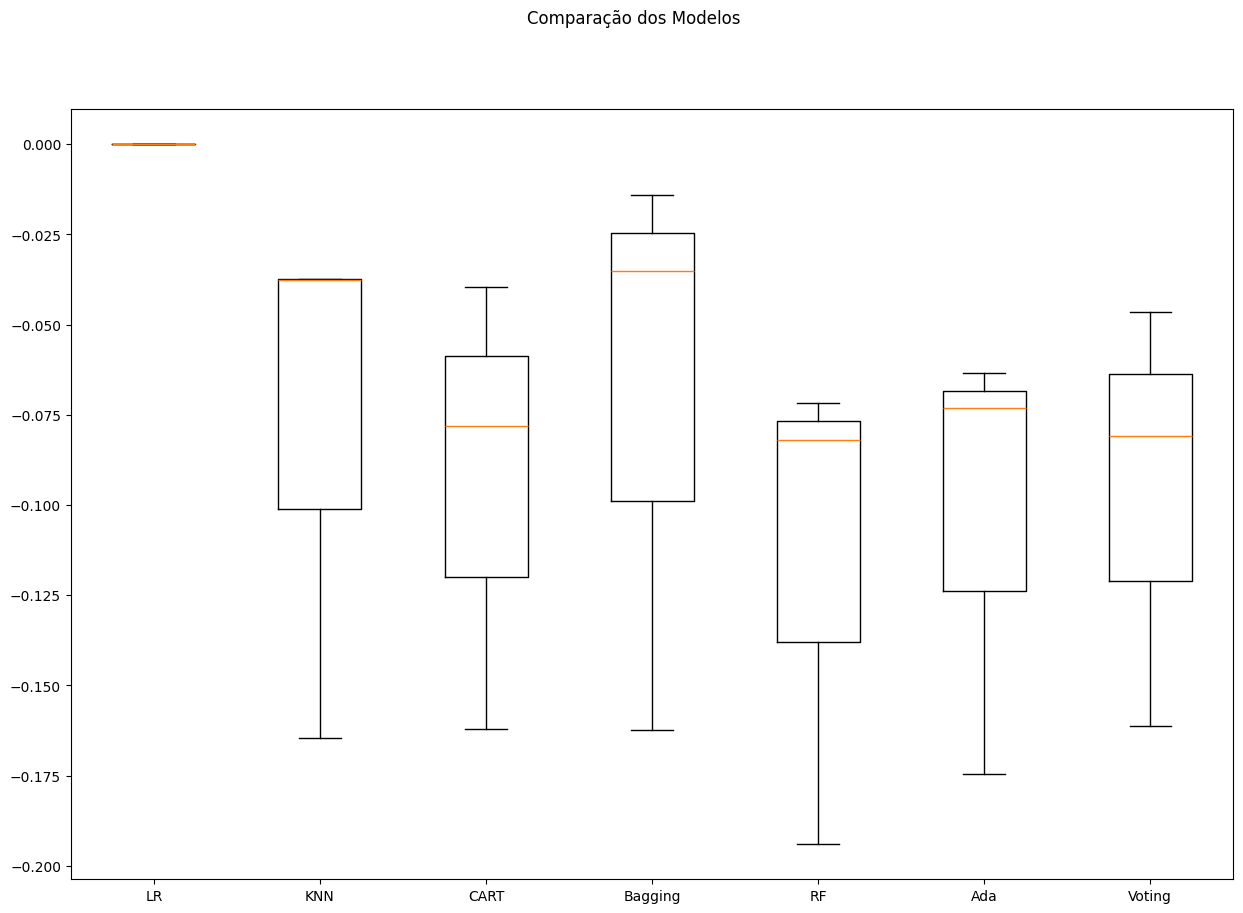

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))


# Definindo os parâmetros do classificador base para o BaggingRegressor
base = DecisionTreeRegressor()
num_trees = 3
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []

model2 = DecisionTreeRegressor()
bases.append(('cart', model2))


# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingRegressor(estimator=base, n_estimators=num_trees, n_jobs=-1)))
models.append(('RF', RandomForestRegressor(n_estimators=num_trees, max_features=max_features, n_jobs=-1 )))
models.append(('Ada', AdaBoostRegressor(n_estimators=num_trees)))
models.append(('Voting', VotingRegressor(bases, n_jobs=-1)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: -0.000 (0.000)
KNN-orig: -0.080 (0.060)
Bag-orig: -0.074 (0.059)
RF-orig: -0.101 (0.065)
Ada-orig: -0.100 (0.053)
Vot-orig: -0.099 (0.054)
LR-padr: -0.000 (0.000)
KNN-padr: -0.310 (0.007)
Bag-padr: -0.073 (0.063)
RF-padr: -0.098 (0.051)
Ada-padr: -0.096 (0.063)
Vot-padr: -0.098 (0.058)
LR-norm: -0.000 (0.000)
KNN-norm: -0.156 (0.070)
Bag-norm: -0.069 (0.062)
RF-norm: -0.103 (0.055)
Ada-norm: -0.095 (0.062)
Vot-norm: -0.095 (0.052)


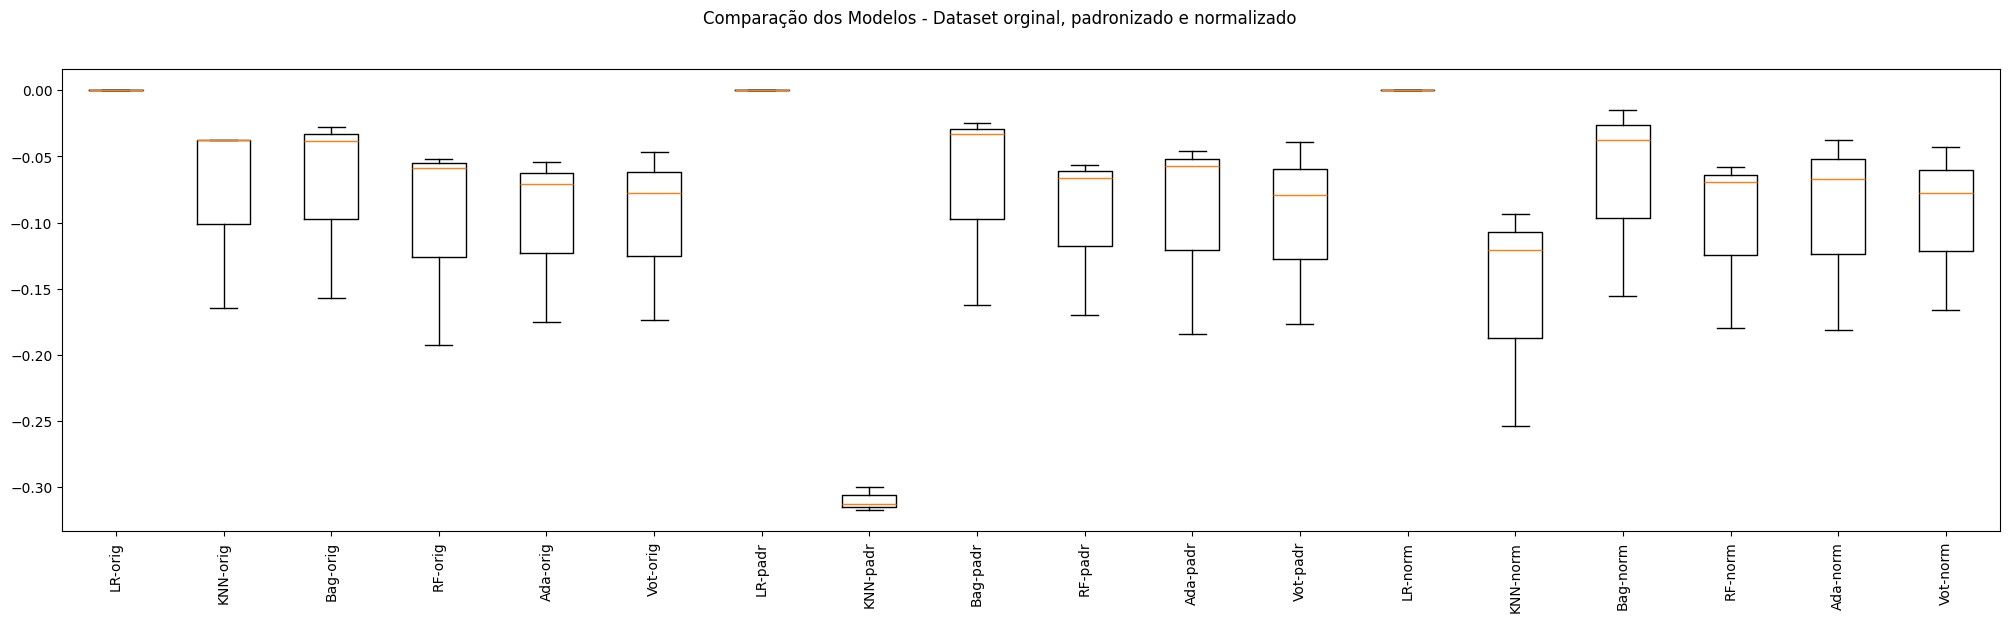

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
LR = ('LR', LinearRegression())
knn = ('KNN', KNeighborsRegressor())
cart = ('CART', DecisionTreeRegressor())


bagging = ('Bag', BaggingRegressor(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestRegressor(n_estimators=num_trees, max_features=max_features))

adaboost = ('Ada', AdaBoostRegressor(n_estimators=num_trees))

voting = ('Voting', VotingRegressor(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([LR])))
pipelines.append(('KNN-orig', Pipeline([knn])))



pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))

pipelines.append(('Ada-orig', Pipeline([adaboost])))

pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, LR])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))



pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))

pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))

pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, LR])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))



pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))

pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))

pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [ ]:
#Tuning do Bagging

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
bagging = ('Bagging', BaggingRegressor())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('bag-orig', Pipeline(steps=[bagging])))
pipelines.append(('bag-padr', Pipeline(steps=[standard_scaler, bagging])))
pipelines.append(('bag-norm', Pipeline(steps=[min_max_scaler, bagging])))

param_grid = {
    'Bagging__n_estimators': [50, 100, 200],  # Número de estimadores (árvores)
    'Bagging__max_samples': [0.01, 1, 1],  # Taxa de aprendizado
    'Bagging__max_features': [0.5, 0.8, 1]  # Taxa de aprendizado
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: bag-orig - Melhor: -0.143037 usando {'Bagging__max_features': 0.8, 'Bagging__max_samples': 0.01, 'Bagging__n_estimators': 100}
Sem tratamento de missings: bag-padr - Melhor: -0.140926 usando {'Bagging__max_features': 0.8, 'Bagging__max_samples': 0.01, 'Bagging__n_estimators': 100}
Sem tratamento de missings: bag-norm - Melhor: -0.142052 usando {'Bagging__max_features': 0.5, 'Bagging__max_samples': 0.01, 'Bagging__n_estimators': 50}


## Finalização do Modelo

In [17]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler()
scaler.fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino

model = BaggingRegressor(n_estimators=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(mean_squared_error(y_test, predictions))

0.013282623672690782


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X_train) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X_train) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y_train)

BaggingRegressor(n_estimators=200)

## Simulando a aplicação do modelo em dados não vistos

In [29]:

# Novos dados - não sabemos a classe!
data = {'Name':  ['mario', 'the elder scrolls', 'gta'],
        'Platform': ['nintendo switch', 'PC', 'Playstation'],
        'Year': [2021, 2022, 2022],
        'Genre': ['Platform', 'Role-Playing', 'Adventure'],
        'Publisher': ['nintendo', 'Bethesda', 'rockstar games'],
        'NA_Sales': [20, 50, 30],


        }



atributos = ['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', ]
new_df = pd.DataFrame(data, columns=atributos)

# Codificando as variáveis categóricas para os novos dados
new_encoded = encoder.transform(new_df[['Name', 'Platform', 'Genre', 'Publisher']])

# Convertendo para DataFrame para visualização
new_encoded_df = pd.DataFrame(new_encoded, columns=encoder.get_feature_names_out(['Name', 'Platform', 'Genre', 'Publisher']))

# Garantir que todas as colunas codificadas do conjunto de treino estejam presentes nos novos dados
# Obtendo as colunas do conjunto de treino
train_encoded_columns = encoded_df.columns

# Verificando quais colunas estão faltando nos novos dados
missing_columns = set(train_encoded_columns) - set(new_encoded_df.columns)

# Adicionando as colunas faltantes aos novos dados com valores nulos ou 0
for col in missing_columns:
    new_encoded_df[col] = 0  # Ou NaN, dependendo do seu modelo

# Garantindo que as colunas estejam na mesma ordem do conjunto de treino
new_encoded_df = new_encoded_df[train_encoded_columns]
# Verifique o número de colunas codificadas para os novos dados
print(new_encoded_df.shape)  # Isso deve ter o mesmo número de colunas que X_train_final

# Normalizando as variáveis numéricas para os novos dados
new_scaled = scaler.transform(new_df[['Year', 'NA_Sales']])

# Convertendo para DataFrame
new_scaled_df = pd.DataFrame(new_scaled, columns=['Year', 'NA_Sales'])




# Concatenando as variáveis codificadas e as variáveis numéricas normalizadas para os novos dados
new_final = pd.concat([new_encoded_df, new_scaled_df], axis=1)
# Verifique as dimensões (número de colunas) após a concatenação
print(f"Dimensões dos novos dados após concatenação: {new_final.shape}")  # Isso deve ter o mesmo número de colunas que X_train_final

# Prevendo com o modelo treinado
new_predictions = model.predict(new_final)

# Exibindo as previsões para os novos dados
print("Predições para os novos dados:")
print(new_predictions)

# Verifique as dimensões (número de colunas) após a concatenação
print(new_final.shape)  # Isso deve ter o mesmo número de colunas que X_train_final


(3, 12115)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Genre_Action
- Genre_Adventure
- Genre_Fighting
- Genre_Misc
- Genre_Platform
- ...


In [ ]:


# Agora, com os dados de entrada já transformados, podemos fazer a predição
saidas = model.predict(X_test)

# Exibindo as predições
print("Predições de classes para os dados de entrada:")
print(saidas)

Predições de classes para os dados de entrada:
[0.08395 0.08235 0.0488  ... 0.0653  0.06085 0.0673 ]
